### Simple Linear Regression
* Given a collection of values representing an **independent variable** (the month/year combination) and a **dependent variable** (the average high temperature for that month/year), simple linear regression describes the relationship between these variables with a straight line, known as the **regression line**

In [21]:
import pandas as pd
import seaborn as sns
sns.set()
temp = pd.read_csv('https://github.com/Cbhami/Coraline/blob/660f4cf0e2307b3460d1116270c916be3295b94a/Resources/csv%20data/user94403143_workout_history.csv')
print(temp)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 26, saw 395


### More Plotting with DataFrames
* The simplest way to plot our data is to place them in a `DataFrame`, then use its **`plot` method** to display the linear relationship between the temperatures
* `style` keyword argument controls the data’s appearance
    * `'.-'` indicates that each point should appear as a dot, and that lines should connect the dots

In [8]:
import pandas as pd
headers_dict = {'Workout Date': 'Workout_Date', 'Avg Pace (min/mi)': 'Avg_Pace', 'Distance (mi)':'Distance', 'Avg Speed (mi/h)':'Avg_Speed', 'Avg Heart Rate':'Avg_Heart_Rate', 'Calories Burned (kCal)':'Calories_Burned', 'Workout Time (seconds)': 'Workout_Time', 'Max Pace (min/mi)':'Max_Pace', 'Max Pace':'Max_Pace', 'Date Submitted':'Date_Submitted', 'Activity Type':'Activity_Type', 'Max Speed (mi/h)':'Max_Speed'}
temp.rename(columns = headers_dict, inplace=True)

In [9]:
temp['Workout_Date'] = pd.to_datetime(temp['Workout_Date'])
temp['Date_Submitted'] = pd.to_datetime(temp['Date_Submitted'])
mean_value = temp['Avg_Heart_Rate'].mean()
temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   656 non-null    datetime64[ns]
 1   Workout_Date     656 non-null    datetime64[ns]
 2   Activity_Type    656 non-null    object        
 3   Calories_Burned  656 non-null    int64         
 4   Distance         656 non-null    float64       
 5   Workout_Time     656 non-null    int64         
 6   Avg_Pace         656 non-null    float64       
 7   Max_Pace         656 non-null    float64       
 8   Avg_Speed        656 non-null    float64       
 9   Max_Speed        656 non-null    float64       
 10  Avg_Heart_Rate   656 non-null    float64       
 11  Steps            632 non-null    float64       
 12  Notes            656 non-null    object        
 13  Source           656 non-null    object        
 14  Link             656 non-null    object   

In [10]:
temp_df = pd.DataFrame(temp)
temp_df.rename(columns = headers_dict, inplace=True)
upd = temp_df.round(2)
upd2 =upd.dropna()
upd3 = upd2[upd2['Avg_Pace'] > 7]
upd4 = upd3[upd3['Avg_Speed'] > 3]
upd4.sort_values(by=['Max_Pace'], ascending=True)
upd5 = upd4[upd4['Avg_Pace'] < 13]
df = upd5[upd5['Activity_Type'] == 'Run']
df['Calculated'] = df['Workout_Time'] / 60
df.count()

C:\Users\coleb\AppData\Local\Temp\ipykernel_14240\2260092203.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calculated'] = df['Workout_Time'] / 60


Date_Submitted     480
Workout_Date       480
Activity_Type      480
Calories_Burned    480
Distance           480
Workout_Time       480
Avg_Pace           480
Max_Pace           480
Avg_Speed          480
Max_Speed          480
Avg_Heart_Rate     480
Steps              480
Notes              480
Source             480
Link               480
Calculated         480
dtype: int64

In [12]:
df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])

df.sort_values(by=['Workout_Date'], ascending=False)

C:\Users\coleb\AppData\Local\Temp\ipykernel_14240\2119545426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])


,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max_Speed,Avg_Heart_Rate,Steps,Notes,Source,Link,Calculated
0,2022-05-01,2022-05-01,Run,402,3.10,1727,9.27,0.45,6.47,132.64,158.00,4584.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6548898358,28.783333
1,2022-04-30,2022-04-30,Run,328,2.43,1356,9.31,0.14,6.45,439.28,163.00,3579.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6546805396,22.600000
2,2022-04-29,2022-04-29,Run,816,6.20,3774,10.14,0.99,5.92,60.38,149.00,10012.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6543975118,62.900000
3,2022-04-29,2022-04-29,Run,399,3.10,1539,8.27,0.00,7.25,0.00,105.13,4157.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6543439534,25.650000
4,2022-04-28,2022-04-28,Run,398,3.11,1659,8.90,0.86,6.74,69.79,149.00,4445.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6541872295,27.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2019-07-04,2019-07-04,Run,156,1.53,816,8.88,0.99,6.76,60.91,159.00,2215.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3645336184,13.600000
613,2019-07-02,2019-07-02,Run,95,1.02,552,9.02,0.34,6.65,174.52,148.00,1439.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3640904221,9.200000
618,2019-06-29,2019-06-29,Run,118,1.27,693,9.13,3.32,6.57,18.06,150.00,1824.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3635614282,11.550000
648,2019-05-19,2019-05-19,Run,419,3.11,2197,11.69,2.06,5.13,29.17,139.00,5295.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3553578067,36.616667


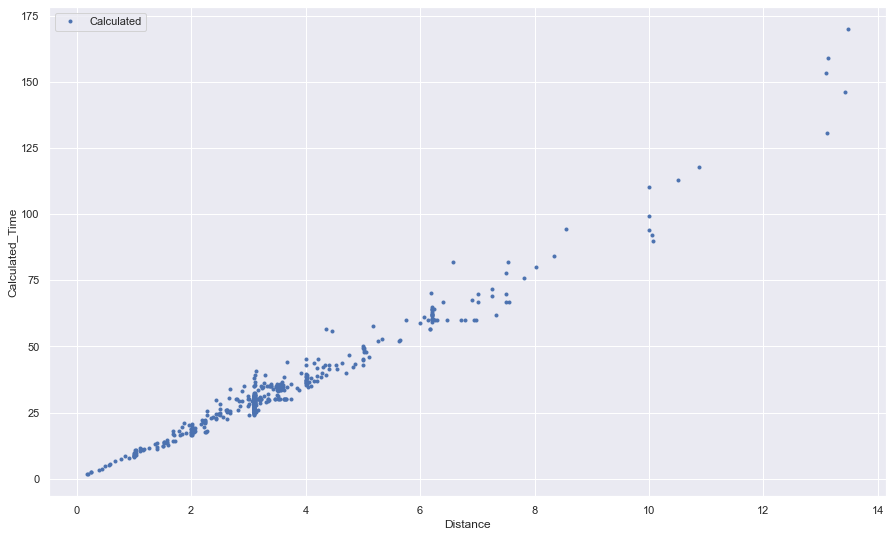

In [93]:

axes = df.plot(x='Distance', y='Calculated', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Calculated_Time')

In [69]:
from scipy import stats

In [70]:
linear_regression = stats.linregress(x=df.Calculated,y=df.Distance)

In [71]:
linear_regression.slope

0.0915085320657033

In [72]:
linear_regression.intercept

0.4181676652807771

* We can use these values with the simple linear regression equation for a straight line to predict the average January temperature in New York City for any given year.
* In the following calculation, `linear_regression.slope` is **_m_**, our input year is **_x_** (the date value for which you’d like to predict the temperature), and `linear_regression.intercept` is **_b_**.
* We can also predict the approximate difference between one year and another.

In [73]:
#The average temperature in New York was just under 40 this year, so pretty close
Half = linear_regression.slope * 13.1 + linear_regression.intercept 
print(Half) 


1.6169294353414903


In [74]:
Full = linear_regression.slope * 26.2 + linear_regression.intercept
print(Full-Half)

1.1987617700607132


### Plotting the Average High Temperatures and a Regression Line
* Seaborn’s **`regplot` function** plots each data point with one attribute on the **_x_****-axis and the other on the **_y_**-axis
* Creates a **scatter plot** or **scattergram** representing the `Temperature`s for the given `Date`s and adds the regression line
* Function `regplot`’s `x` and `y` keyword arguments are one-dimensional arrays of the same length representing the **_x-y_** coordinate pairs to plot

In [75]:
import seaborn as sns
sns.set_style('whitegrid')

(-11.45724155787983, 178.48367816942283)

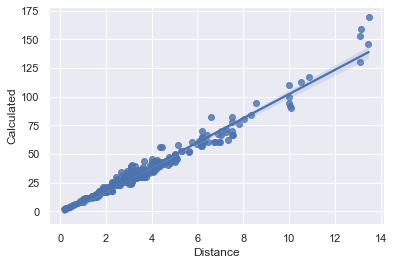

In [94]:
axes = sns.regplot(x=df.Distance, y=df.Calculated)
axes.set_ylim()

## EDA FOR PLOTTING


### summary statistics

In [86]:
df.head(1)


,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max Speed,Avg_Heart_Rate,Steps,Notes,Source,Link,Calculated
0,2022-04-23,2022-04-23,Run,404,3.1,1604,8.62,0.0,6.96,0.0,104.45,4312.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6531527377,26.733333


In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 643
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Submitted   473 non-null    datetime64[ns]
 1   Workout_Date     473 non-null    datetime64[ns]
 2   Activity_Type    473 non-null    object        
 3   Calories_Burned  473 non-null    int64         
 4   Distance         473 non-null    float64       
 5   Workout_Time     473 non-null    int64         
 6   Avg_Pace         473 non-null    float64       
 7   Max_Pace         473 non-null    float64       
 8   Avg_Speed        473 non-null    float64       
 9   Max Speed        473 non-null    float64       
 10  Avg_Heart_Rate   473 non-null    float64       
 11  Steps            473 non-null    float64       
 12  Notes            473 non-null    object        
 13  Source           473 non-null    object        
 14  Link             473 non-null    object   

In [88]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max Speed', 'Avg_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link',
       'Calculated'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

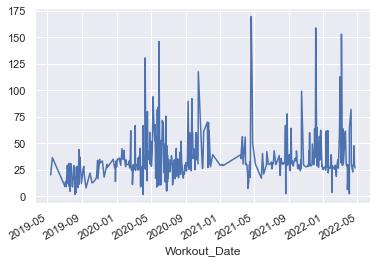

In [95]:
# show data of one subject
mask1 = df['Activity_Type'] == 'Run'
(
    df[mask1]
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

### plot the average of `Calculated` data


<AxesSubplot:xlabel='Workout_Date'>

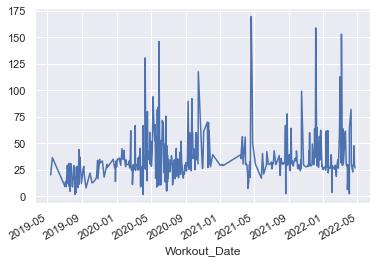

In [96]:
# basic approach to plot using matplotlib w/ chaining approach
(
    df
    .set_index('Workout_Date')
    ['Calculated']
    .plot()
)

<AxesSubplot:xlabel='Workout_Date'>

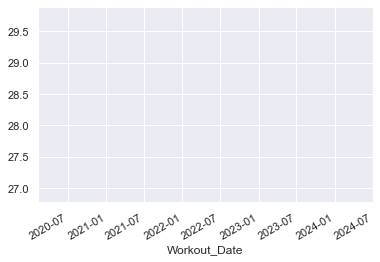

In [99]:
# check a subjects, on a particular day's data
(
    df
    .set_index('Workout_Date')
    .query('Workout_Date == 20220422')
    ['Calculated']
    .plot()
)


In [104]:
# # get the total stepcounts of a subject each day
# def get_subject_agg_each_day(Activity_Type):
#     return (
#         df.groupby(
#             ['Activity_Type'])
#         .sum()
#         [[Activity_Type]]
#         # .plot(kind='bar')
#     )


In [119]:
# get the agg of a col
group = df.groupby(
    'Date_Submitted').count(

    ).sort_values(
        by=['Workout_Date'],
         ascending=False)

In [120]:
group.head()

,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max Speed,Avg_Heart_Rate,Steps,Notes,Source,Link,Calculated
Date_Submitted,,,,,,,,,,,,,,,
2019-08-21,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2022-03-31,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2021-12-30,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2021-09-13,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2020-03-26,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


### correlation matrix / Pairplot


In [124]:
df.head(2)

,Date_Submitted,Workout_Date,Activity_Type,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max Speed,Avg_Heart_Rate,Steps,Notes,Source,Link,Calculated
0,2022-04-23,2022-04-23,Run,404,3.1,1604,8.62,0.0,6.96,0.0,104.45,4312.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6531527377,26.733333
1,2022-04-23,2022-04-23,Run,403,3.1,1659,8.92,0.0,6.73,0.0,104.45,4444.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6530209972,27.650000


In [125]:
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max Speed', 'Avg_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link',
       'Calculated'],
      dtype='object')

### Heatmap - correlation


In [126]:
# show the correlation matrix
df.corr()


,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max Speed,Avg_Heart_Rate,Steps,Calculated
Calories_Burned,1.000000,0.975118,0.972269,0.285174,-0.126548,-0.276366,0.057285,0.160642,0.966551,0.972269
Distance,0.975118,1.000000,0.982607,0.241772,-0.119464,-0.236776,0.072212,0.216019,0.985304,0.982607
Workout_Time,0.972269,0.982607,1.000000,0.386466,-0.096560,-0.375341,0.088875,0.218639,0.989773,1.000000
Avg_Pace,0.285174,0.241772,0.386466,1.000000,0.061842,-0.989449,0.062365,0.174011,0.342739,0.386466
Max_Pace,-0.126548,-0.119464,-0.096560,0.061842,1.000000,-0.074962,-0.080003,0.102120,-0.124619,-0.096560
Avg_Speed,-0.276366,-0.236776,-0.375341,-0.989449,-0.074962,1.000000,-0.059839,-0.187543,-0.338158,-0.375341
Max Speed,0.057285,0.072212,0.088875,0.062365,-0.080003,-0.059839,1.000000,0.088246,0.089821,0.088875
Avg_Heart_Rate,0.160642,0.216019,0.218639,0.174011,0.102120,-0.187543,0.088246,1.000000,0.218415,0.218639
Steps,0.966551,0.985304,0.989773,0.342739,-0.124619,-0.338158,0.089821,0.218415,1.000000,0.989773
Calculated,0.972269,0.982607,1.000000,0.386466,-0.096560,-0.375341,0.088875,0.218639,0.989773,1.000000


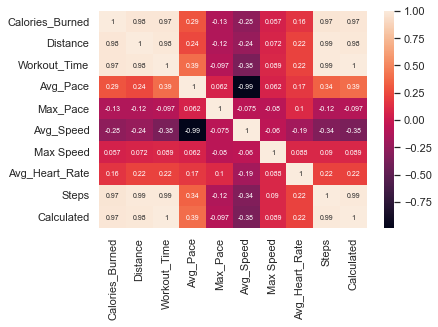

In [128]:
# show the correlation heatmap

# library
import seaborn as sns
import pandas as pd
import numpy as np

# Default heatmap
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


In [129]:
# show columns
df.columns


Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max Speed', 'Avg_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link',
       'Calculated'],
      dtype='object')

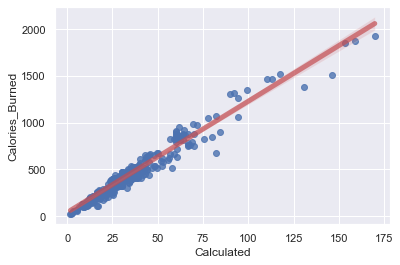

In [130]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Calculated"], y=df["Calories_Burned"],
            line_kws={"color": "r", "alpha": 0.7, "lw": 5})
plt.show()


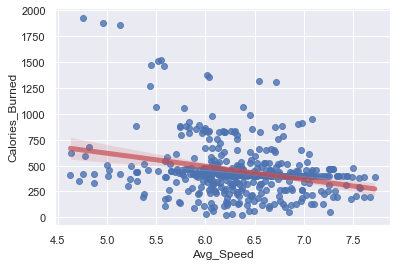

In [131]:
# Linear regression b/w steps count and movement intensity
import seaborn as sns
import matplotlib.pyplot as plt

# plot
sns.regplot(x=df["Avg_Speed"], y=df["Calories_Burned"],
            line_kws={"color": "r", "alpha": 0.7, "lw": 5})
plt.show()


In [132]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max Speed', 'Avg_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link',
       'Calculated'],
      dtype='object')

<AxesSubplot:>

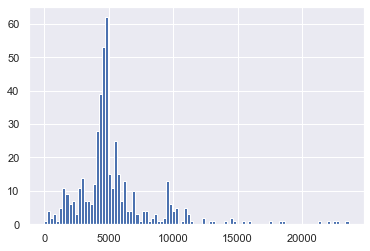

In [133]:
mask1 = df['Steps'] == 0  # get the rows where steps count is 0
df[~mask1]['Steps'].hist(bins=100)


In [151]:
df2 = df[['Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max Speed', 'Avg_Heart_Rate', 'Steps',
       'Calculated']]
df2.corr()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Max_Pace,Avg_Speed,Max Speed,Avg_Heart_Rate,Steps,Calculated
Calories_Burned,1.000000,0.975118,0.972269,0.285174,-0.126548,-0.276366,0.057285,0.160642,0.966551,0.972269
Distance,0.975118,1.000000,0.982607,0.241772,-0.119464,-0.236776,0.072212,0.216019,0.985304,0.982607
Workout_Time,0.972269,0.982607,1.000000,0.386466,-0.096560,-0.375341,0.088875,0.218639,0.989773,1.000000
Avg_Pace,0.285174,0.241772,0.386466,1.000000,0.061842,-0.989449,0.062365,0.174011,0.342739,0.386466
Max_Pace,-0.126548,-0.119464,-0.096560,0.061842,1.000000,-0.074962,-0.080003,0.102120,-0.124619,-0.096560
Avg_Speed,-0.276366,-0.236776,-0.375341,-0.989449,-0.074962,1.000000,-0.059839,-0.187543,-0.338158,-0.375341
Max Speed,0.057285,0.072212,0.088875,0.062365,-0.080003,-0.059839,1.000000,0.088246,0.089821,0.088875
Avg_Heart_Rate,0.160642,0.216019,0.218639,0.174011,0.102120,-0.187543,0.088246,1.000000,0.218415,0.218639
Steps,0.966551,0.985304,0.989773,0.342739,-0.124619,-0.338158,0.089821,0.218415,1.000000,0.989773
Calculated,0.972269,0.982607,1.000000,0.386466,-0.096560,-0.375341,0.088875,0.218639,0.989773,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df2.values.reshape(-1,1).shape

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()

In [ ]:
linear_regression.fit(X=X_train,
                     y=y_train)

In [ ]:
linear_regression.coef_

In [ ]:
linear_regression.intercept_

In [ ]:
predicted = linear_regression.predict(X_test)
expected=y_test

In [ ]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.20f}, expected: {e:.20f}')

In [ ]:
predictfun = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [ ]:
for curx in X_test[::5]:
    curval = predictfun(curx)[0]
    print(f'{curval:.20f}')

In [ ]:
print(f'{predictfun(10)[0]:.2f}')

In [ ]:
yhat = 0.0017*x + 0.275
import seaborn as sns
axes = sns.scatterplot(data=df2, x='color_intensity', y='alcohol', palette='winter', hue='flavanoids',
                       legend=True)
#axes.set_ylim(0, 20)

import numpy as np

x = np.array([min(df2.color_intensity.values),
             max(df2.color_intensity.values)]
            )
y = predictfun(x)

import matplotlib.pyplot as plt

line=plt.plot(x,y)

In [ ]:
results = df2.OLS(y,x).fit()
results.summary()

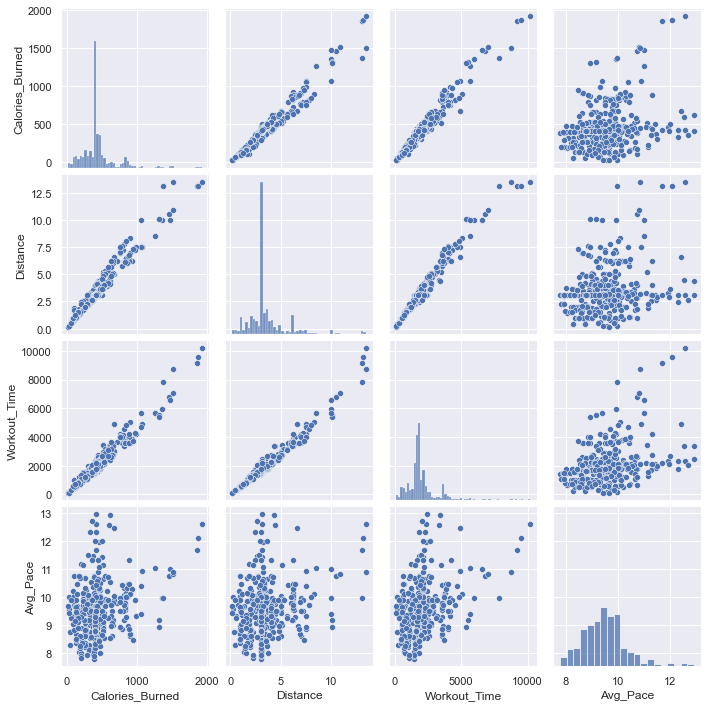

In [149]:
sns.pairplot(df2, vars = df2.columns[0:4])

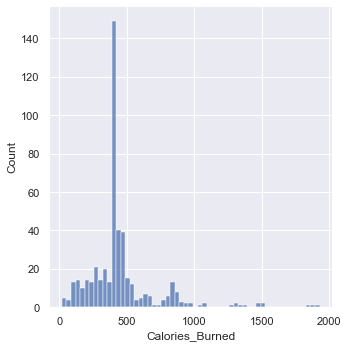

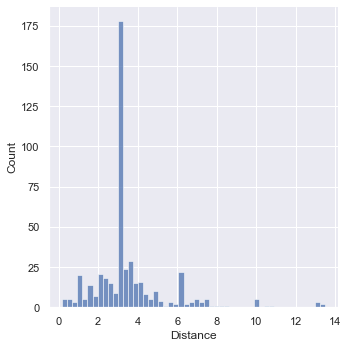

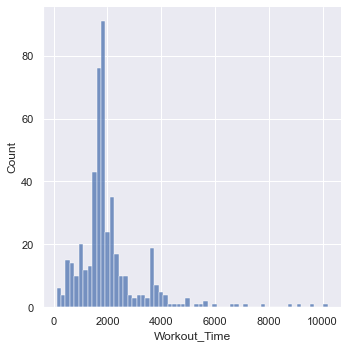

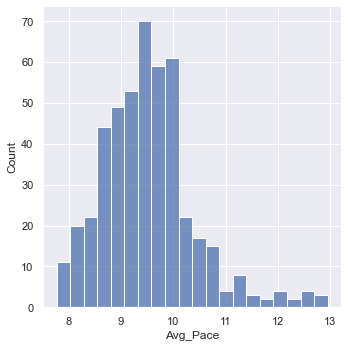

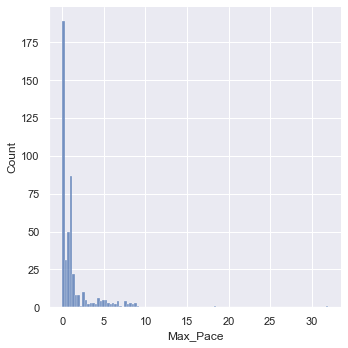

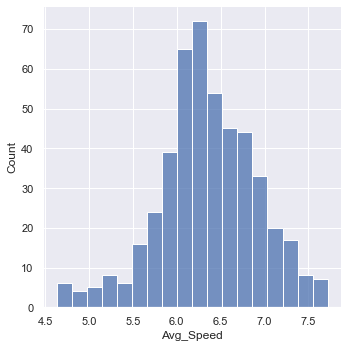

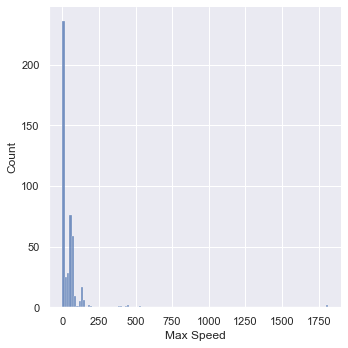

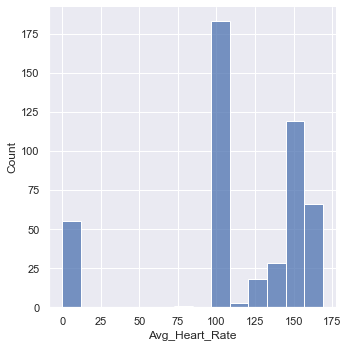

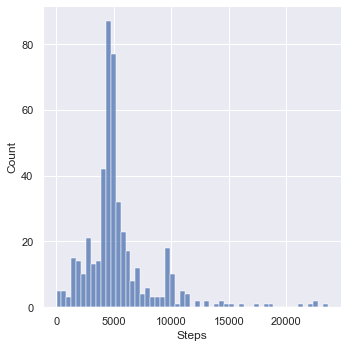

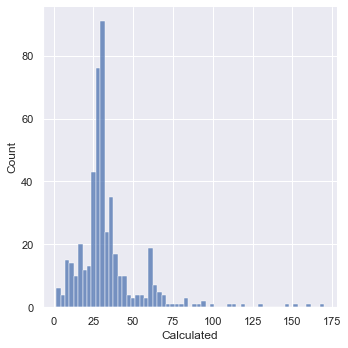

In [157]:
for column in df2:
    sns.displot(x=column, data=df2)

In [160]:
df.columns

Index(['Date_Submitted', 'Workout_Date', 'Activity_Type', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Max_Pace', 'Avg_Speed',
       'Max Speed', 'Avg_Heart_Rate', 'Steps', 'Notes', 'Source', 'Link',
       'Calculated'],
      dtype='object')

In [161]:
# Convert x column to numpy array
X = df2.loc[:, ['Calories_Burned']].values

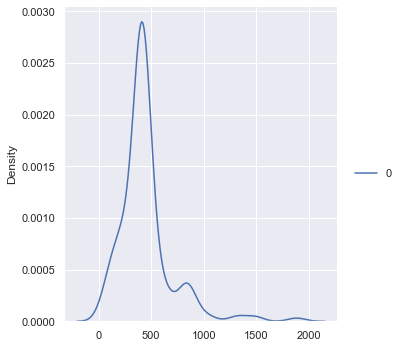

In [162]:
sns.displot(X, kind='kde')

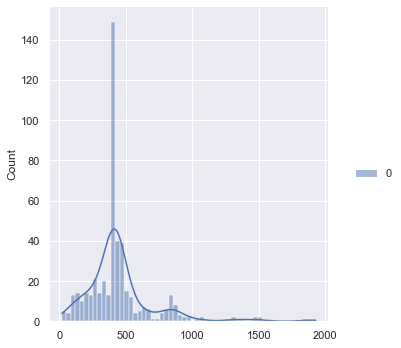

In [163]:
sns.displot(X, kde=True)

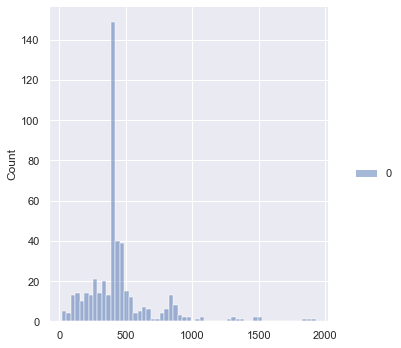

In [164]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(size=1000)

#create normal distribution histogram
sns.displot(X)

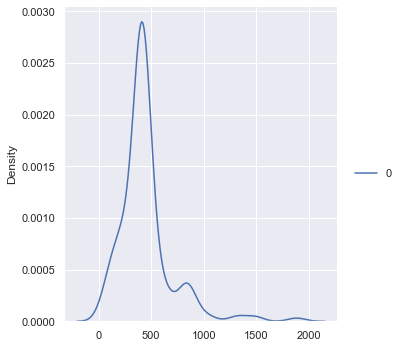

In [165]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#X = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(X, kind='kde')

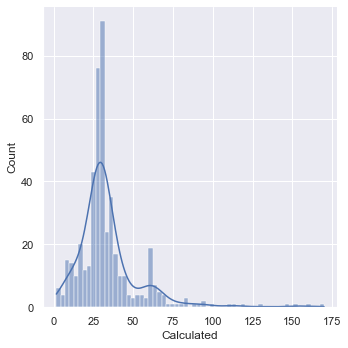

In [173]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
#x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(df2, x='Calculated', kde=True)

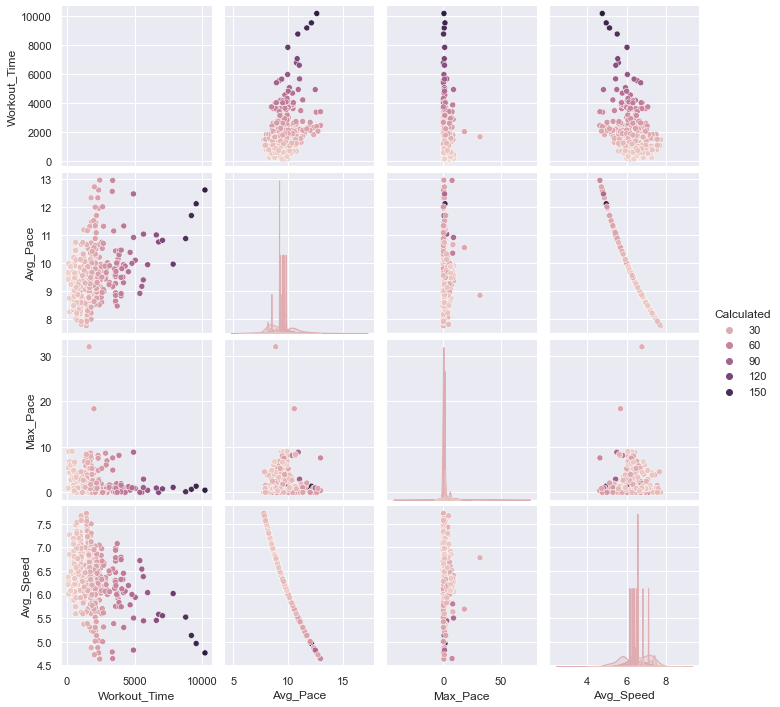

In [136]:
sns.pairplot(data = df, vars = df.columns[5:9], hue = 'Calculated')

In [134]:
# import dash libraries
import dash
import dash_html_components as html             # for html
import dash_core_components as dcc              # for graph objects
from dash.dependencies import Input, Output     # for interactivity
import plotly.graph_objs as go                  # for plotly graphs

from datetime import date

# import bootstrap for dash
# import dash_bootstrap_components as dbc

C:\Users\coleb\AppData\Local\Temp\ipykernel_44804\196781580.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html             # for html
C:\Users\coleb\AppData\Local\Temp\ipykernel_44804\196781580.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc              # for graph objects
